In [123]:
#librerias
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [124]:
#importar data base
df = pd.read_csv('sleep_dataset.csv', sep=";")
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27.0,Software Engineer,6.1,6,42,6,Overweight,126/83,77.0,4200,Normal
1,2,Male,28.0,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000,Normal
2,3,Male,28.0,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000,Normal
3,4,Male,28.0,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000,Sleep Apnea
4,5,Male,28.0,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59.0,Nurse,8.1,9,75,3,Overweight,140/95,68.0,7000,Sleep Apnea
370,371,Female,59.0,Nurse,8.0,9,75,3,Overweight,140/95,68.0,7000,Sleep Apnea
371,372,Female,59.0,Nurse,8.1,9,75,3,Overweight,140/95,NaN,7000,Sleep Apnea
372,373,Female,59.0,Nurse,8.1,9,75,3,Overweight,140/95,NaN,7000,Sleep Apnea


# **Analisis exploratorio de los datos**

In [125]:
#Forma del dataframe
df.shape

(374, 13)

In [126]:
#columnas
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [127]:
#información
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      370 non-null    float64
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               368 non-null    float64
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(3), int64(5), object(5)
memory usage: 38.1+ KB


In [128]:
#estadisticas de variables numericas
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,370.000000,374.000000,374.000000,374.000000,374.000000,368.000000,374.000000
mean,187.500000,42.286486,7.132086,7.312834,59.171123,5.385027,70.190217,6816.844920
std,108.108742,8.656597,0.795657,1.196956,20.830804,1.774526,4.163120,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,36.000000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [129]:
# Moda
moda = df[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']].mode().iloc[0]
moda

,0
Age,43.0
Sleep Duration,7.2
Quality of Sleep,8.0
Physical Activity Level,60.0
Stress Level,3.0
Heart Rate,68.0
Daily Steps,8000.0


In [130]:
# Rango
columnas = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
rango = df[columnas].max() - df[columnas].min()
rango

,0
Age,32.0
Sleep Duration,2.7
Quality of Sleep,5.0
Physical Activity Level,60.0
Stress Level,5.0
Heart Rate,21.0
Daily Steps,7000.0


In [131]:
# Estadistica de variables cateogoricas
df.describe(include=object)

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,374
unique,2,11,4,25,3
top,Male,Nurse,Normal,130/85,Normal
freq,189,73,195,99,219


In [132]:
#valores categoricos de las diferentes variables

print("Genero: ", df['Gender'].unique(),' Cantidad: ', len(df['Gender'].unique()))
print("Ocupacion: ", df['Occupation'].unique(),' Cantidad: ', len(df['Occupation'].unique()))
print("Categoria BMI: ", df['BMI Category'].unique(),' Cantidad: ', len(df['BMI Category'].unique()))
print("Presion sanguinea: ", df['Blood Pressure'].unique(),' Cantidad: ', len(df['Blood Pressure'].unique()))
print("Desorden de sueño: ", df['Sleep Disorder'].unique(),' Cantidad: ', len(df['Sleep Disorder'].unique()))


Genero:  ['Male' 'Female']  Cantidad:  2
Ocupacion:  ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']  Cantidad:  11
Categoria BMI:  ['Overweight' 'Normal' 'Obese' 'Normal Weight']  Cantidad:  4
Presion sanguinea:  ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']  Cantidad:  25
Desorden de sueño:  ['Normal' 'Sleep Apnea' 'Insomnia']  Cantidad:  3


In [133]:
#primeras filas
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27.0,Software Engineer,6.1,6,42,6,Overweight,126/83,77.0,4200,Normal
1,2,Male,28.0,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000,Normal
2,3,Male,28.0,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000,Normal
3,4,Male,28.0,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000,Sleep Apnea
4,5,Male,28.0,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000,Sleep Apnea


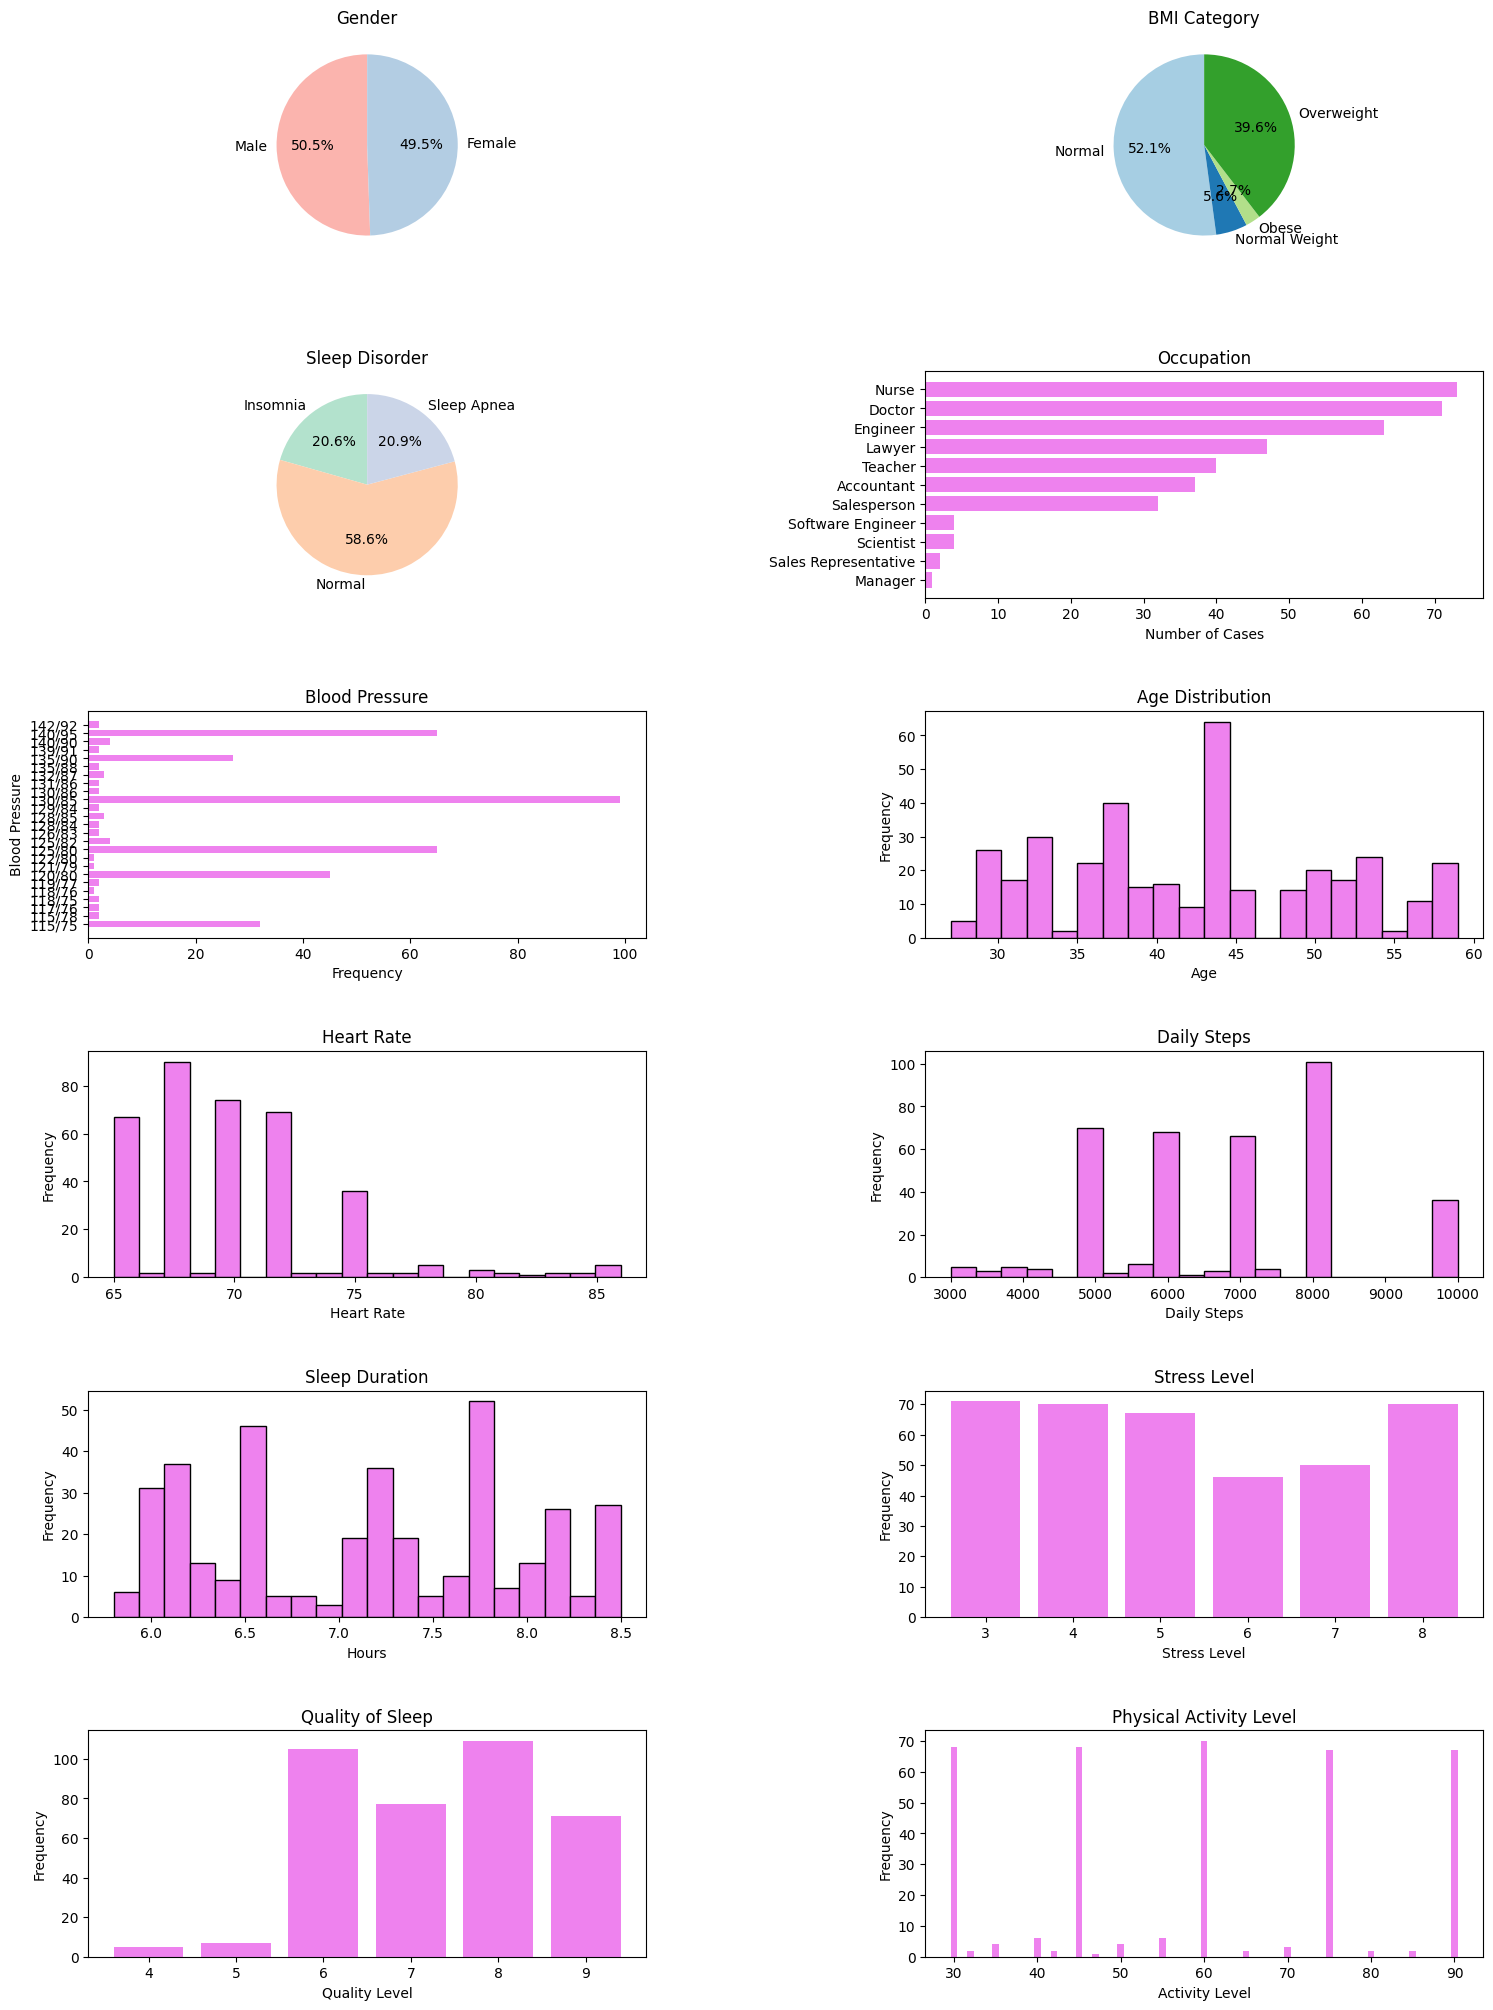

In [134]:
# Graficos
# Figura
fig, ax = plt.subplots(6, 2, figsize=(18, 25))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

#Grafico de genero --> torta
gender = df['Gender'].value_counts()
ax[0, 0].pie(gender.values, labels=gender.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
ax[0, 0].set_title('Gender')

# Gráfico de categoria BMI --> torta
bmiTypes = df['BMI Category'].value_counts().sort_index()
ax[0, 1].pie(bmiTypes.values, labels=bmiTypes.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
ax[0, 1].set_title('BMI Category')

# Gráfico de problemas de sueño --> torta
sleepDisorder = df['Sleep Disorder'].value_counts().sort_index()
ax[1, 0].pie(sleepDisorder.values, labels=sleepDisorder.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel2.colors)
ax[1, 0].set_title('Sleep Disorder')

#Grafico de ocupacion --> barras horizontales porque hay mucho desbalance para usar uno de pie
ocupacion = df['Occupation'].value_counts()
ax[1, 1].barh(ocupacion.index[::-1], ocupacion.values[::-1], color='violet')
ax[1, 1].set_title('Occupation')
ax[1, 1].set_xlabel('Number of Cases')

# Gráfico de barras vertical para Blood Pressure, con valores en el eje Y y frecuencia en el eje X
bloodPressure = df['Blood Pressure'].value_counts().sort_index()
ax[2, 0].barh(bloodPressure.index, bloodPressure.values, color='violet')
ax[2, 0].set_title('Blood Pressure')
ax[2, 0].set_xlabel('Frequency')
ax[2, 0].set_ylabel('Blood Pressure')

#Grafico de edad --> histograma
age = df['Age']
ax[2, 1].hist(age, bins=20, color='violet', edgecolor='black')
ax[2, 1].set_title('Age Distribution')
ax[2, 1].set_xlabel('Age')
ax[2, 1].set_ylabel('Frequency')

#Grafico de ritmo cardiaco --> histograma
heartRate = df['Heart Rate']
ax[3, 0].hist(heartRate, bins=20, color='violet', edgecolor='black')
ax[3, 0].set_title('Heart Rate')
ax[3, 0].set_xlabel('Heart Rate')
ax[3, 0].set_ylabel('Frequency')

#Grafico de pasos diarios --> histograma
dailySteps = df['Daily Steps']
ax[3, 1].hist(dailySteps, bins=20, color='violet', edgecolor='black')
ax[3, 1].set_title('Daily Steps')
ax[3, 1].set_xlabel('Daily Steps')
ax[3, 1].set_ylabel('Frequency')

#Grafico de duracion del sueño -> histograma
sleepDuration = df['Sleep Duration']
ax[4, 0].hist(sleepDuration, bins=20, color='violet', edgecolor='black')
ax[4, 0].set_title('Sleep Duration')
ax[4, 0].set_xlabel('Hours')
ax[4, 0].set_ylabel('Frequency')

# Gráfico nivel de estres --> barras verticales
stressLevel = df['Stress Level'].value_counts().sort_index()
ax[4, 1].bar(stressLevel.index, stressLevel.values, color='violet')
ax[4, 1].set_title('Stress Level')
ax[4, 1].set_xlabel('Stress Level')
ax[4, 1].set_ylabel('Frequency')

#Grafico de calidad de sueño --> barras verticales
qualityOfSleep = df['Quality of Sleep'].value_counts().sort_index()
ax[5, 0].bar(qualityOfSleep.index, qualityOfSleep.values, color='violet')
ax[5, 0].set_title('Quality of Sleep')
ax[5, 0].set_xlabel('Quality Level')
ax[5, 0].set_ylabel('Frequency')

#Grafico de nivel de actividad fisica -> barras verticales
physicalActivityLevel = df['Physical Activity Level'].value_counts().sort_index()
ax[5, 1].bar(physicalActivityLevel.index, physicalActivityLevel.values, color='violet')
ax[5, 1].set_title('Physical Activity Level')
ax[5, 1].set_xlabel('Activity Level')
ax[5, 1].set_ylabel('Frequency')


plt.show()

# **Preprocesamiento del conjunto de datos**

In [135]:
# Eliminar columnas innecesarias
# ID persona
df = df.drop(['Person ID'], axis=1)

In [136]:
# Valores faltantes
df.isnull().sum()

,0
Gender,0
Age,4
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0
Heart Rate,6


Lo ideal es preguntar a los profesionales del rubro en particular (en este caso, especialistas del sueño) qué hacer en estos casos de datos faltantes, y evaluar si es posible relevar estos datos para los registros.
Nuestra solución para ellos será visualizar la mediana y la media de éstas variables y utilizar uno de éstos valores como relleno. Consideramos ésto como una buena opción dado que los datos faltantes son de edad y de tasa de latidos, y es poco probable que la falta de estos valores tengan una razón sistemática por la propia naturaleza de los datos, y son muy pocos los faltantes como para introducir sesgo por falta de datos en caso de que sea por una razón sistemática. Por ello, creemos que es seguro conservar los registros reemplazandolo por uno de éstos atributos.

In [137]:
#age median y media
print("Mediana edad: ",df['Age'].median(),"media edad: ", df['Age'].mean())
#Heart rate median y media
print("Mediana Heart rate : ",df['Heart Rate'].median(),"media Heart rate : ", df['Heart Rate'].mean())

Mediana edad:  43.0 media edad:  42.28648648648649
Mediana Heart rate :  70.0 media Heart rate :  70.19021739130434


In [138]:
# Reemplazo valores nulos de filas por medias de su columna correspondiente
df[['Age']] = df[['Age']].fillna(value=df['Age'].median())
df[['Heart Rate']] = df[['Heart Rate']].fillna(value=df['Heart Rate'].median())

In [139]:
# Clases de la variable objetivo
df['Sleep Disorder'].unique()

array(['Normal', 'Sleep Apnea', 'Insomnia'], dtype=object)

Text(0.5, 1.0, 'Boxplots')

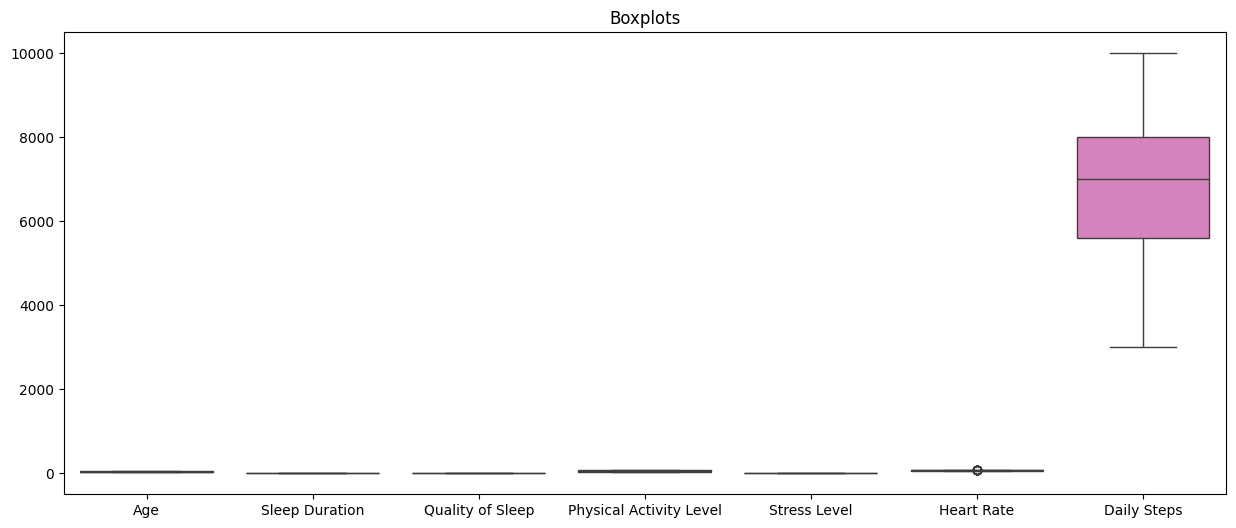

In [140]:
# Valores atipicos
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(data=df, ax=ax)
ax.set_title('Boxplots')

Text(0.5, 1.0, 'Boxplots')

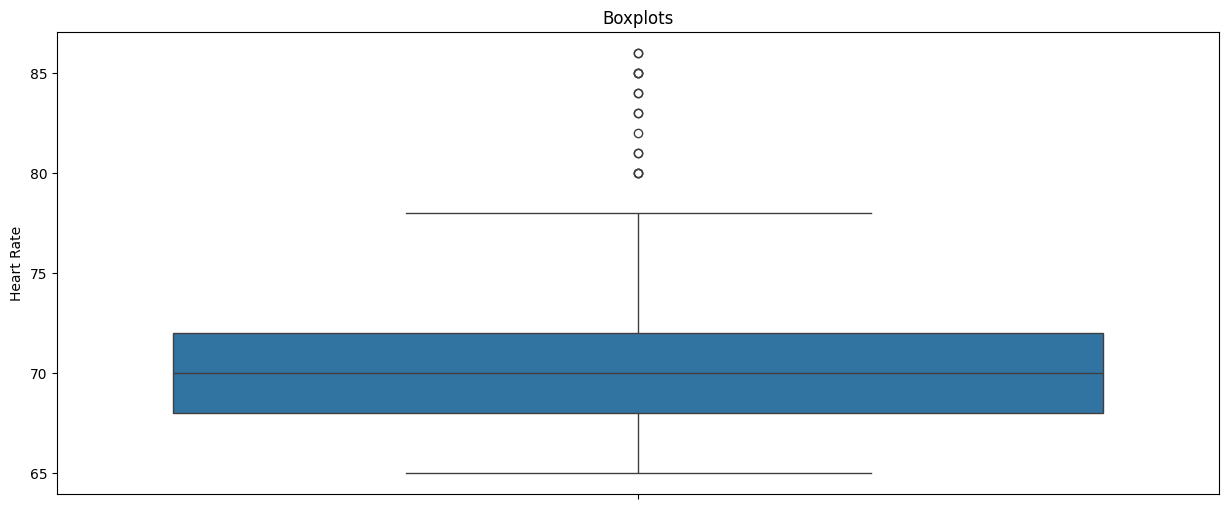

In [141]:
# Valores atípicos de Heart Rate
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(data=df['Heart Rate'], ax=ax)
ax.set_title('Boxplots')

In [142]:
# Ante estos valores debemos consultar a un profesional si eliminarlos o no reemplazarlos por algun valor,
# y si asi quisieramos podriamos reemplazarlos por la media
df.loc[df['Heart Rate'] > 80]

#si quisieramos eliminarlos podriamos reemplazarlos por la media --> aun no lo implementé xq eso le debo preguntar al profe
#df.loc[df['Heart Rate'] > 80, 'Heart Rate'] = df.Heart Rate.median()

#consultando a un profesional (el profesor de la catedra) se decidió dejar estos valores

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
3,Male,28.0,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000,Sleep Apnea
4,Male,28.0,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000,Sleep Apnea
5,Male,43.0,Software Engineer,5.9,4,30,8,Obese,140/90,85.0,3000,Insomnia
6,Male,29.0,Teacher,6.3,6,40,7,Obese,140/90,82.0,3500,Insomnia
80,Female,34.0,Scientist,5.8,4,32,8,Overweight,131/86,81.0,5200,Sleep Apnea
81,Female,34.0,Scientist,5.8,4,32,8,Overweight,131/86,81.0,5200,Sleep Apnea
93,Male,35.0,Lawyer,7.4,7,60,5,Obese,135/88,84.0,3300,Sleep Apnea
145,Female,38.0,Lawyer,7.4,7,60,5,Obese,135/88,84.0,3300,Sleep Apnea
264,Male,48.0,Doctor,7.3,7,65,5,Obese,142/92,83.0,3500,Insomnia
266,Male,48.0,Doctor,7.3,7,65,5,Obese,142/92,83.0,3500,Insomnia


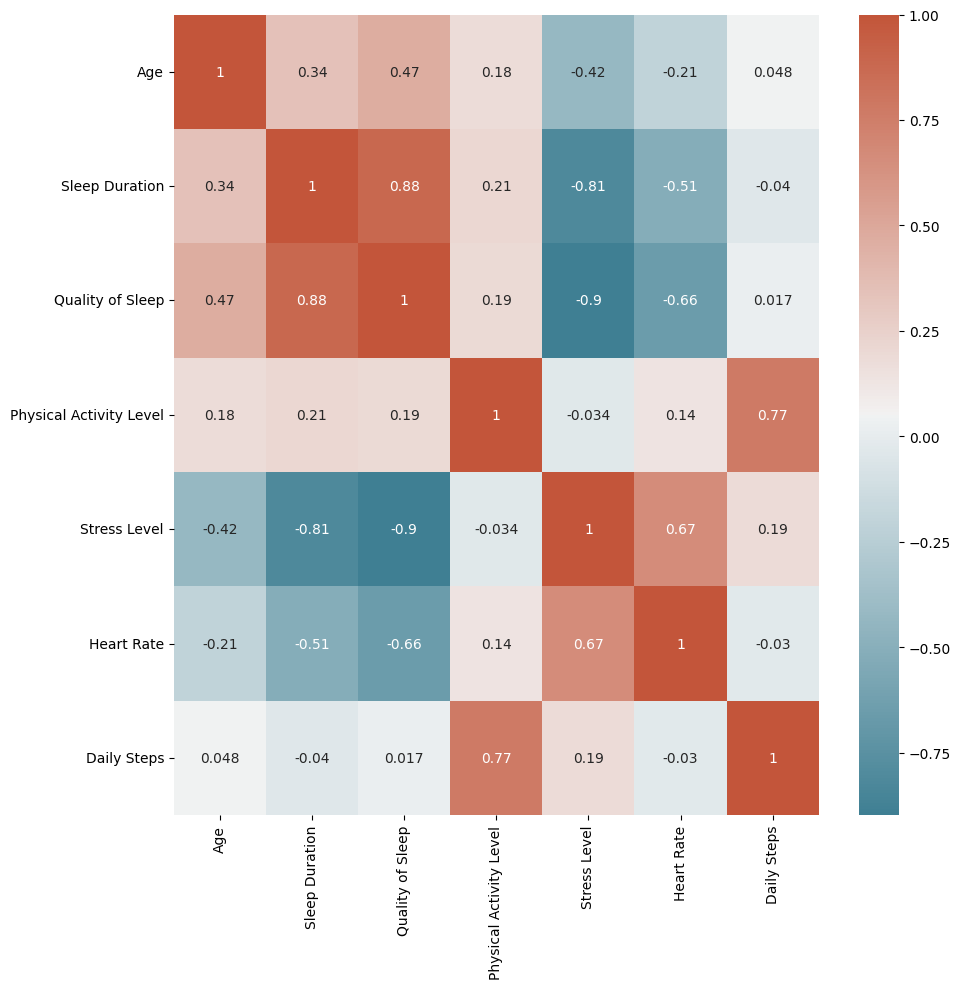

In [143]:
# Correlacion entre variables numericas
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.tight_layout()


In [144]:
# Eliminacion de variables con alta correlacion (0.8)
# Sleep duration vs quality sleep
# Calculamos un vector con las medias de cada columna
column_mean = corr.mean(axis=1)
column_mean

,0
Age,0.200492
Sleep Duration,0.153530
Quality of Sleep,0.143910
Physical Activity Level,0.351409
Stress Level,-0.045206
Heart Rate,0.056628
Daily Steps,0.279268


In [145]:
# Sleep duration es mayor asi que se elimina sleep duration
df = df.drop(['Sleep Duration'], axis=1)

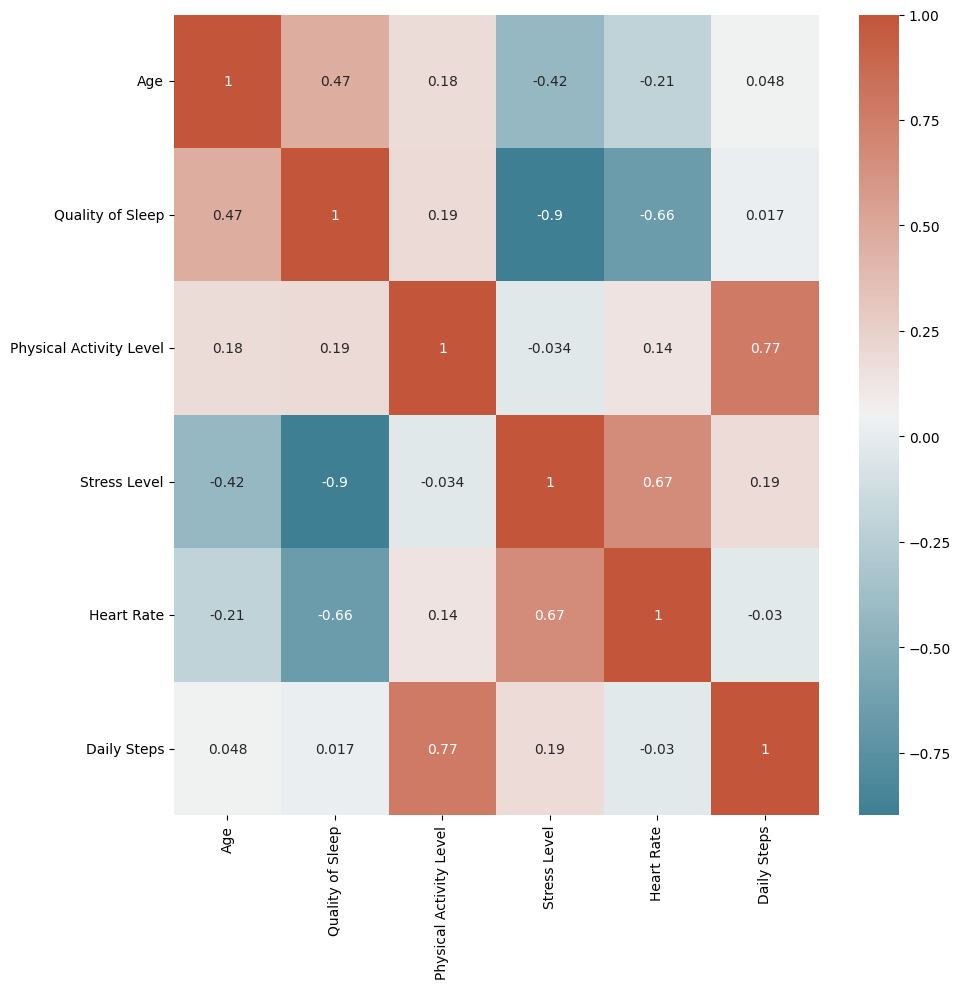

In [146]:
# Como buena practica volvemos a ver la matriz de calor para analizar la correlacion entre variables numericas
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.tight_layout()

In [147]:
# Procesamiento de variables categoricas
# para esto utilizaremos label encoding ya que tenemos muchas caracteristicas con muchos valores posibles, emplear otros metodos podria generar una matriz demasiado grande
def label_encoding(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

label_encoding(df)

df.head()

,Gender,Age,Occupation,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,27.0,9,6,42,6,3,11,77.0,4200,1
1,1,28.0,1,6,60,8,0,9,75.0,10000,1
2,1,28.0,1,6,60,8,0,9,75.0,10000,1
3,1,28.0,6,4,30,8,2,22,85.0,3000,2
4,1,28.0,6,4,30,8,2,22,85.0,3000,2


Text(0.5, 1.0, 'Boxplots')

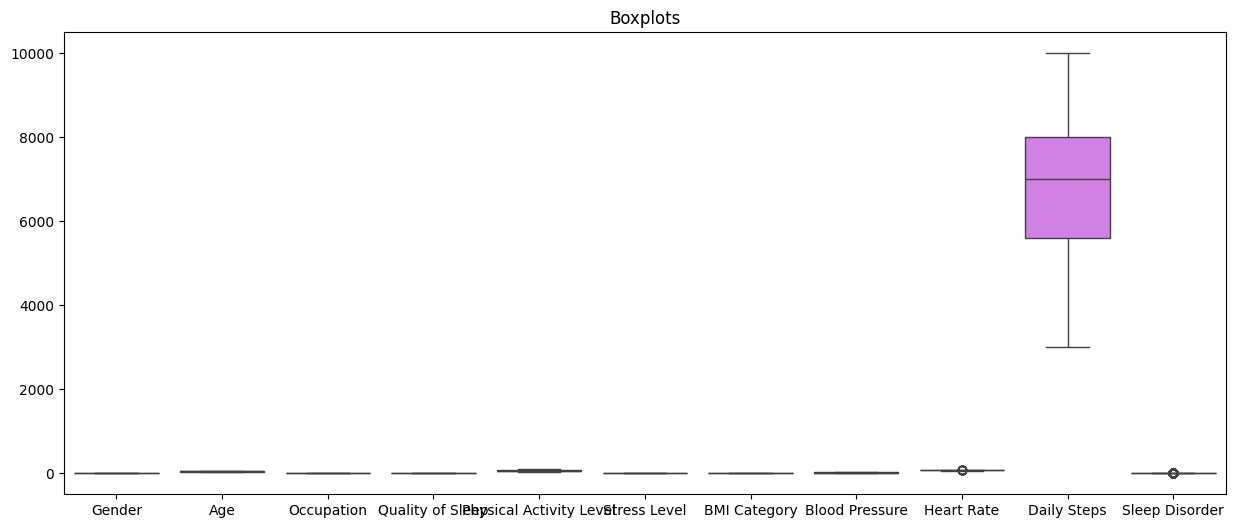

In [148]:
# Valores atipicos
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(data=df, ax=ax)
ax.set_title('Boxplots')

In [149]:
# Dividir dataset
# Seleccionar las columnas del dataset que corresponden a las entradas del modelo y la salida esperada.
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

In [150]:
X

,Gender,Age,Occupation,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,27.0,9,6,42,6,3,11,77.0,4200
1,1,28.0,1,6,60,8,0,9,75.0,10000
2,1,28.0,1,6,60,8,0,9,75.0,10000
3,1,28.0,6,4,30,8,2,22,85.0,3000
4,1,28.0,6,4,30,8,2,22,85.0,3000
...,...,...,...,...,...,...,...,...,...,...
369,0,59.0,5,9,75,3,3,23,68.0,7000
370,0,59.0,5,9,75,3,3,23,68.0,7000
371,0,59.0,5,9,75,3,3,23,70.0,7000
372,0,59.0,5,9,75,3,3,23,70.0,7000


In [151]:
y

,Sleep Disorder
0,1
1,1
2,1
3,2
4,2
...,...
369,2
370,2
371,2
372,2


<Axes: xlabel='Sleep Disorder', ylabel='count'>

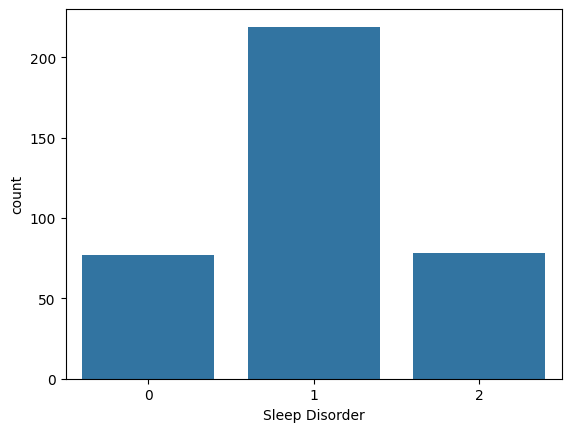

In [152]:
# Balancear data sets
# Visualizar el balance del dataset generado
sns.countplot(x=y)

In [153]:
# Generar un nuevos conjunto de datos balanceado por Over-sampling
#En un primer intento utilizamos la estrategia oversampler, pero esta no funcionó, dejaba las columnas 0 y 1 iguales pero la 2 no variaba, por este error decidimos probar con undersample
oversample = RandomOverSampler(sampling_strategy='not majority')
X_over, y_over = oversample.fit_resample(X, y)

# Definimos la estrategia de undersample, la clase minoritaria tendrá la misma cantidad que la mayoritaria.
#undersample = RandomUnderSampler(random_state=42)
# Generamos el nuevo dataset balanceado
#X_over, y_over = undersample.fit_resample(X, y)

<Axes: xlabel='Sleep Disorder', ylabel='count'>

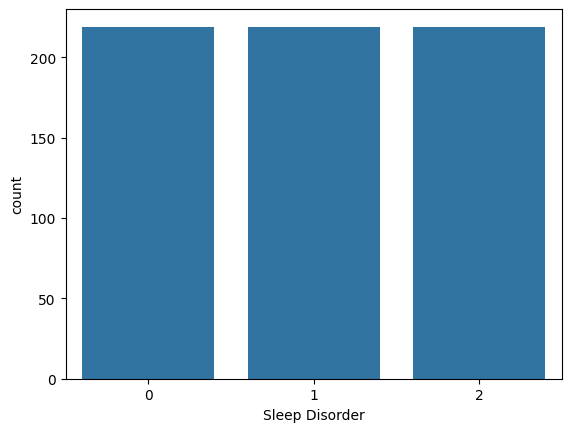

In [154]:
# Visualizar el balance del dataset generado
sns.countplot(x=y_over)

<Axes: >

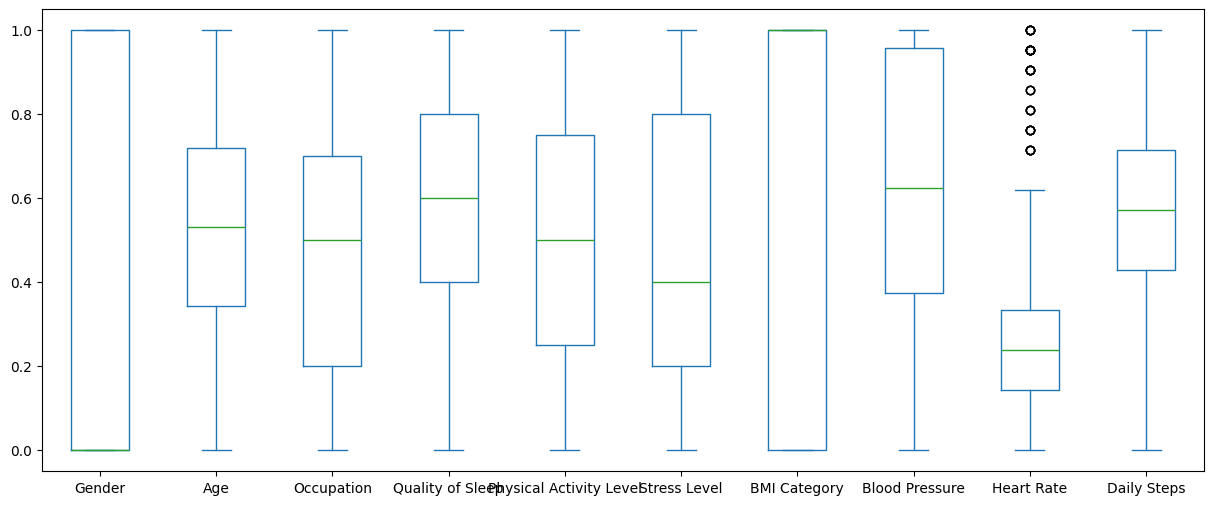

In [155]:
# Normalizacion de los datos
X_normal = X_over.copy()

# Aplicamos normalización a todas las columnas
columns = X.columns
for column in columns:
  X_normal[column] = (X_normal[column] - X_normal[column].min()) / (X_normal[column].max() - X_normal[column].min())
  # Visualizamos la distribución de las distintas variables
fig, ax = plt.subplots(figsize=(15,6))
X_normal.loc[:,columns].plot(kind='box', ax=ax)

# **Entrenamiento de modelos de aprendizaje**

## Modelos a utilizar
Al identificar como variable objetivo la variable 'Sleep disorder' y ver que ésta es una variable categórica con tres valores únicos (Normal, Apnea, Insomnia), los modelos a emplear en ambos casos serán modelos de clasificación multiclase.
Los seleccionados son: un modelo KNN, un modelo de máquina de vectores de soporte para clasificación, y un modelo de random forest. Para estos último se utilizará además una búsqueda en grid para ajustar hiperparámetros, mientras el primero se hará bajo prueba y error manual. Todos son provistos por la librería sklearn.

### Importar librerías y generar conjuntos de entrenamiento y de prueba

In [156]:
# Imports sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Imports para graficar
# Imports
import seaborn as sns
import matplotlib.pyplot as plt

In [157]:
# Splits
# Tomamos 30% del conjunto como conjunto de test.
X_train, X_test, y_train, y_test = train_test_split(X_normal, y_over, test_size=0.3)

### Entrenamiento del modelo de regresión logística

Primero probaremos el modelo con la regularización por defecto.

In [158]:
# Instanciamos modelo de regresión logística.
modeloRLogistica = LogisticRegression(multi_class='multinomial', C=1.0)
modeloRLogistica

LogisticRegression(multi_class='multinomial')

In [159]:
# Entrenamos el modelo con los datos
modeloRLogistica.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [160]:
# Testeamos el modelo.
# Calculamos el accuracy y F1 para el conjunto de test
# realizando predicciones para el conjunto test
lrPredictions = modeloRLogistica.predict(X_test)
# Cálculo del Accuracy
lrTestAccuracy = accuracy_score(lrPredictions, y_test)
# Cálculo de F1-Score
lrTestF1 = f1_score(lrPredictions, y_test, average='macro')
print('Accuracy para los datos de test: ', lrTestAccuracy)
print('F1-Score para los datos de test: ', lrTestF1)

Accuracy para los datos de test:  0.8888888888888888
F1-Score para los datos de test:  0.8887926160160831


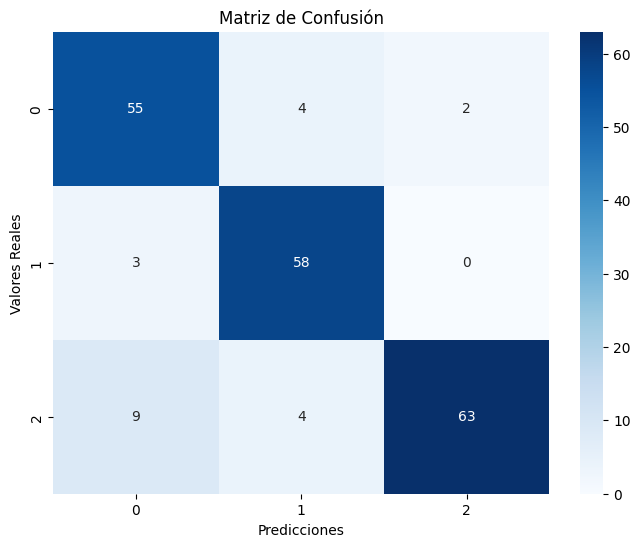

In [161]:
cm = confusion_matrix(y_test, lrPredictions)

# Visualizar la matriz con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

#### Entrenamiento del modelo de regresión logística con C=0.1

In [162]:
# Instanciamos modelo de regresión logística con C=0.1
modeloRLogistica = LogisticRegression(multi_class='multinomial', C=0.1)
modeloRLogistica

LogisticRegression(C=0.1, multi_class='multinomial')

In [163]:
# Entrenamos el modelo con los datos
modeloRLogistica.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=0.1, multi_class='multinomial')

In [164]:
lrPredictions = modeloRLogistica.predict(X_test)

lrTestAccuracy = accuracy_score(lrPredictions, y_test)

lrTestF1 = f1_score(lrPredictions, y_test, average='macro')
print('Accuracy para los datos de test: ', lrTestAccuracy)
print('F1-Score para los datos de test: ', lrTestF1)

Accuracy para los datos de test:  0.8434343434343434
F1-Score para los datos de test:  0.8431633566686223


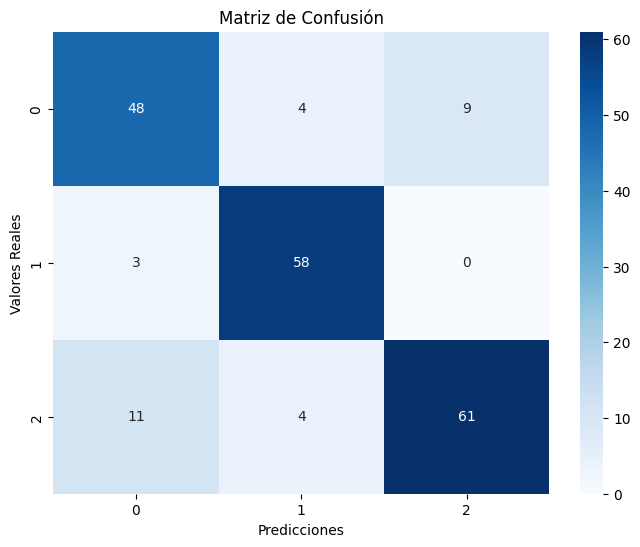

In [165]:
cm = confusion_matrix(y_test, lrPredictions)

# Visualizar la matriz con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

#### Entrenamiento del modelo con C=10

In [166]:
# Instanciamos modelo de regresión logística con C=10.0
modeloRLogistica = LogisticRegression(multi_class='multinomial', C=10.0)
modeloRLogistica

LogisticRegression(C=10.0, multi_class='multinomial')

In [167]:
# Entrenamos el modelo con los datos
modeloRLogistica.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10.0, multi_class='multinomial')

In [168]:
lrPredictions = modeloRLogistica.predict(X_test)

lrTestAccuracy = accuracy_score(lrPredictions, y_test)

lrTestF1 = f1_score(lrPredictions, y_test, average='macro')
print('Accuracy para los datos de test: ', lrTestAccuracy)
print('F1-Score para los datos de test: ', lrTestF1)

Accuracy para los datos de test:  0.898989898989899
F1-Score para los datos de test:  0.8981107078168337


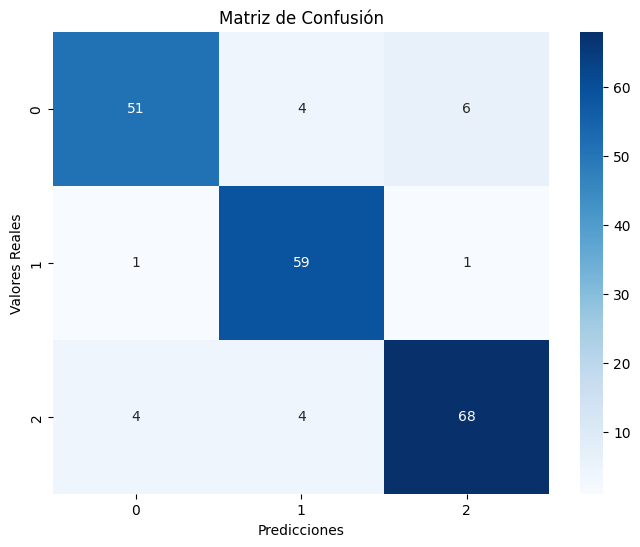

In [169]:
cm = confusion_matrix(y_test, lrPredictions)

# Visualizar la matriz con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

#### Entrenamiento del modelo con C=100.0

In [170]:
# Instanciamos modelo de regresión logística con C=100.0
modeloRLogistica = LogisticRegression(multi_class='multinomial', C=100.0)
modeloRLogistica

LogisticRegression(C=100.0, multi_class='multinomial')

In [171]:
# Entrenamos el modelo con los datos
modeloRLogistica.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=100.0, multi_class='multinomial')

In [172]:
lrPredictions = modeloRLogistica.predict(X_test)

lrTestAccuracy = accuracy_score(lrPredictions, y_test)

lrTestF1 = f1_score(lrPredictions, y_test, average='macro')
print('Accuracy para los datos de test: ', lrTestAccuracy)
print('F1-Score para los datos de test: ', lrTestF1)

Accuracy para los datos de test:  0.8888888888888888
F1-Score para los datos de test:  0.8884818884818885


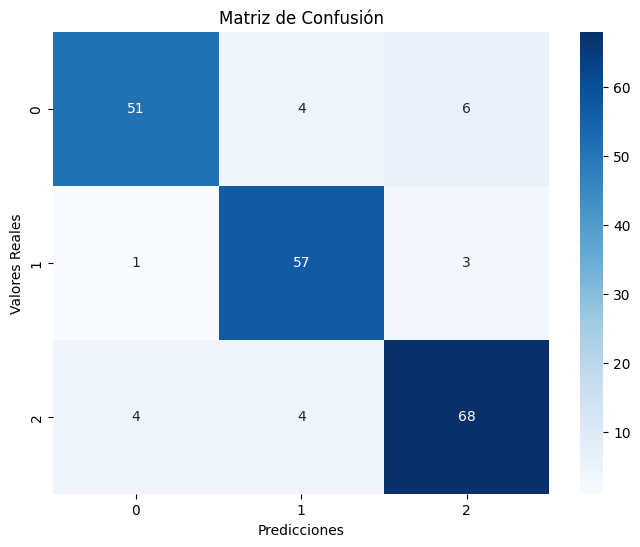

In [173]:
cm = confusion_matrix(y_test, lrPredictions)

# Visualizar la matriz con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

### Entrenamiento del modelo de SVM

El ajuste de hiperparametros lo haremos con Grid.

In [174]:
# Armamos una grid con los parámetros
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [1e-4, 1e-3, 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

In [175]:
# Instanciamos un modelo SVM con GridSearchCV
# Búsqueda con 5 Folds
grid_search_svm = GridSearchCV(estimator=SVC(), param_grid=param_grid)
grid_search_svm.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [176]:
# Buscamos el mejor estimador
grid_search_svm.best_estimator_

SVC(C=0.01, gamma=10, kernel='poly')

In [177]:
svmPredictions = grid_search_svm.predict(X_test)

svmTestAccuracy = accuracy_score(svmPredictions, y_test)

svmTestF1 = f1_score(svmPredictions, y_test, average='macro')
print('Accuracy para los datos de test: ', svmTestAccuracy)
print('F1-Score para los datos de test: ', svmTestF1)

Accuracy para los datos de test:  0.9242424242424242
F1-Score para los datos de test:  0.9238356164383562


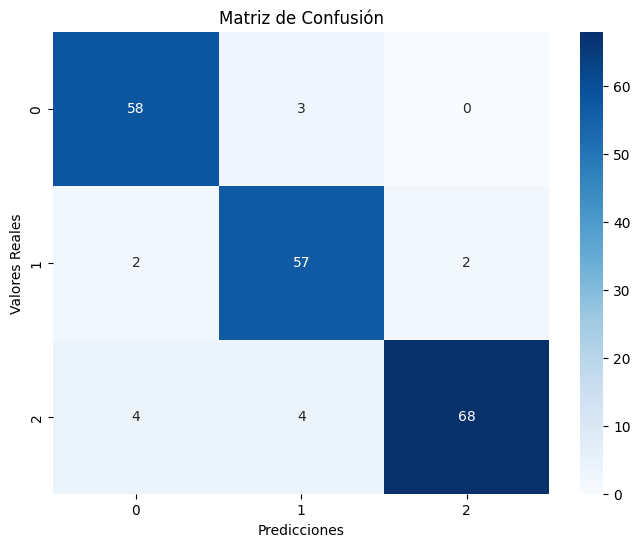

In [178]:
cm = confusion_matrix(y_test, svmPredictions)

# Visualizar la matriz con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

### Entrenamiento del modelo Random Forest

Entrenaremos un modelo de RandomTreeClassifier con GridSearchCV.

In [179]:
# Grilla de parámetros y valores
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

In [180]:
# Búsqueda con 5 Folds
modelTree = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)
modelTree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [181]:
# Buscamos el mejor estimador
modelTree.best_estimator_

RandomForestClassifier()

In [182]:
treePredictions = modelTree.predict(X_test)

treeTestAccuracy = accuracy_score(treePredictions, y_test)

treeTestF1 = f1_score(treePredictions, y_test, average='macro')
print('Accuracy para los datos de test: ', treeTestAccuracy)
print('F1-Score para los datos de test: ', treeTestF1)

Accuracy para los datos de test:  0.9444444444444444
F1-Score para los datos de test:  0.9434757337983144


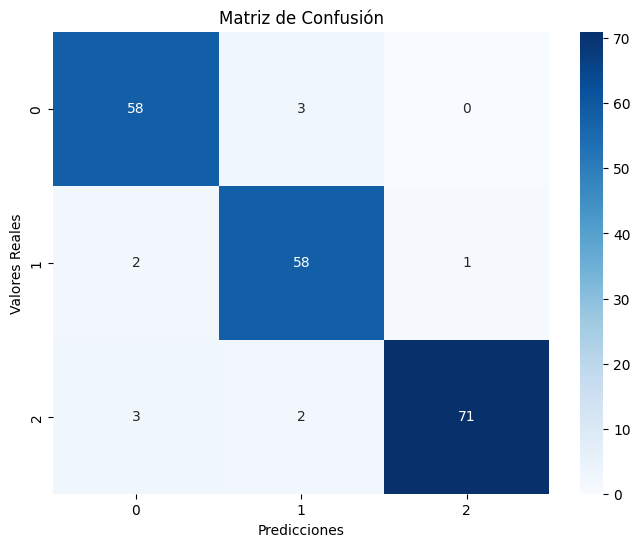

In [183]:
cm = confusion_matrix(y_test, treePredictions)

# Visualizar la matriz con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()